In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

**Task3.1**

In [ ]:
x_values = np.load("x_values.npy")
y_values = np.load("y_values.npy")

model = LinearRegression().fit(x_values, y_values)


In [ ]:
x_test = np.load("test_x_values.npy")
y_predict = model.predict(x_test)

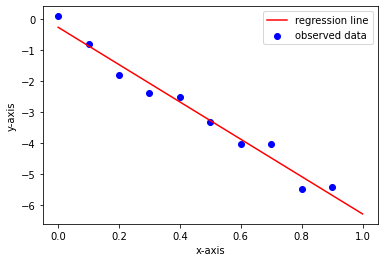

In [ ]:
plt.figure () 
plt.scatter(x_values, y_values, color='blue', marker='o', label = 'observed data')
plt.plot(x_test, y_predict, color = 'red', label = 'regression line')
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.show()

In [ ]:
X = np.array(0.48)
x = X.reshape(-1, 1)
print(x)
y = model.predict(x)
print(y)


[[0.48]]
[[-3.14442237]]


**Task3.2**

In [ ]:
from sklearn.decomposition import PCA
data = np.load("wineData.npy")
labels = np.load("wineLabels.npy")

In [ ]:
training_data = data[0:142]
testing_data = data[142:178]

training_labels = labels[0:142]
testing_labels = labels[142:178]

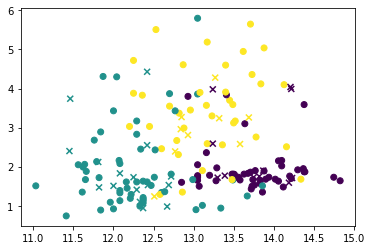

In [ ]:
plt.scatter(training_data[:,0],training_data[:,1], marker = 'o', c = training_labels)
plt.scatter(testing_data[:,0],testing_data[:,1], marker = 'x', c = testing_labels)


Text(0, 0.5, 'PC2')

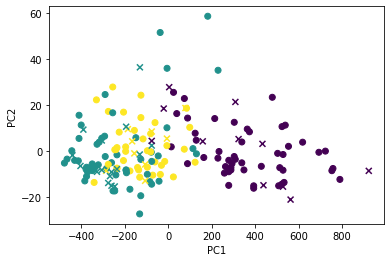

In [ ]:
pca = PCA(n_components = 2)

trainingComponents = pca.fit_transform(training_data)
testingComponents = pca.transform(testing_data)

plt.scatter(trainingComponents[:,0], trainingComponents[:,1], marker = 'o', c=training_labels)
plt.scatter(testingComponents[:,0], testingComponents[:,1], marker = 'x', c=testing_labels)
plt.xlabel("PC1")
plt.ylabel("PC2")

**Task3.3**

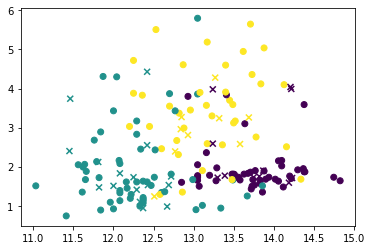

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components=2)
LDA.fit(training_data,training_labels)
dim_red = LDA.transform(training_data)

plt.scatter(training_data[:,0], training_data[:,1], marker = 'o', c = training_labels)
plt.scatter(testing_data[:,0], testing_data[:,1], marker = 'x', c = testing_labels)


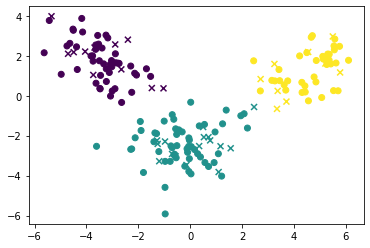

In [ ]:
dim_red_test = LDA.transform(testing_data)

plt.scatter(dim_red_test[:,0], dim_red_test[:,1], marker = 'x', c = testing_labels)
plt.scatter(dim_red[:,0], dim_red[:,1], marker = 'o', c = training_labels)


**Task3.4**

In [20]:
mean = np.mean(training_data, axis = 0) 
centered_mean = training_data - mean

U,S,VT = np.linalg.svd(centered_mean)

VT = VT[:2,:]

V= np.transpose(VT)

training_prj = np.matmul(centered_mean, V)
x_training_prj_data = training_prj[:,:2]
testing_data_mean= testing_data - training_data.mean()
testing_prj = np.matmul(testing_data_mean, V)
x_testing_prj_data = testing_prj[:,:2]
print(x_training_prj_data.shape)

[1.30259155e+01 2.33838028e+00 2.36633803e+00 1.95760563e+01
 9.98732394e+01 2.31084507e+00 2.06894366e+00 3.52605634e-01
 1.61281690e+00 5.15253521e+00 9.63704225e-01 2.60760563e+00
 7.56387324e+02]
(142, 2)


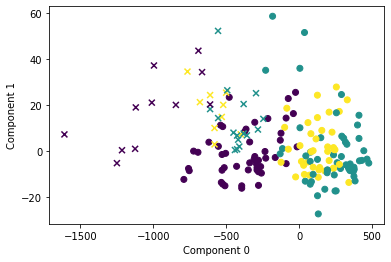

In [ ]:
plt.scatter(x_training_prj_data[:, 0], x_training_prj_data[:, 1], marker='o', c = training_labels)   #plotting the graph
plt.scatter(x_testing_prj_data[:,0],x_testing_prj_data[:,1], marker='x', c = testing_labels)
plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.show()

**Task3.5**

(60000, 87)


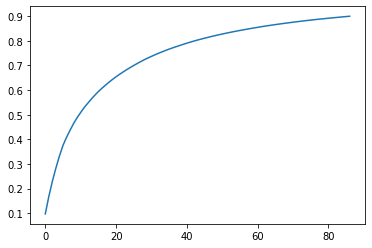

In [ ]:
data = np.load("task3_5_data.npy")
labels = np.load("task3_5_labels.npy")

PCA_second = PCA(0.9)      
PCA_second.fit(data)
transformed_data = PCA_second.transform(data)
print(transformed_data.shape)

plt.plot(np.cumsum(PCA_second.explained_variance_ratio_)) #Cummulative sum of variance
plt.show()